#  Importing and Preparing Data

In [478]:
#Importing pandas and numpy libraries
import pandas as pd
import numpy as np

In [479]:
#Reading the dataset into a dataframe
data=pd.read_csv("C:\\Users\\Shrinidhi Narasimhan\\Documents\\UpGrad_ML_And_AI\\Main Program\\Machine Learning\\Geely_Auto_CaseStudy\\CarPrice_Assignment.csv")

In [480]:
#Creating a new column 'Company_Name' whose values are extracted from the CarName column
data['Company_Name']=data['CarName'].str.split(' ').str[0]

In [481]:
data['Company_Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [482]:
#Correcting miss-spelled values in company names,drivewheel columns and making the case of the values the same
data=data.replace({'Company_Name':{'vw':'volkswagen','vokswagen':'volkswagen','toyouta':'toyota','porcshce':'porsche','maxda':'mazda'},'drivewheel':{'4wd':'fwd'}})
data['Company_Name']=data['Company_Name'].str.lower()

In [483]:
#to verify the results of the above cleaning step
data['Company_Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [484]:
#converting values into 1 or 0 based on value in categorical feature columns with 2 categories
data['fueltype'] = data['fueltype'].map({'diesel': 1, 'gas': 0})
data['aspiration'] = data['aspiration'].map({'std': 1, 'turbo': 0})
data['enginelocation'] = data['enginelocation'].map({'front': 1, 'rear': 0})
data['drivewheel'] = data['drivewheel'].map({'fwd': 1, 'rwd': 0})
data['doornumber']=data['doornumber'].map({'two':1,'four':0})

In [485]:
#Dropping CarName column
data=data.drop(['CarName'],axis=1)

In [486]:
# Creating dummy variables for columns with more that 2 categories
dummy1=pd.get_dummies(data['carbody'],drop_first=True)
dummy2=pd.get_dummies(data['fuelsystem'],drop_first=True)
dummy3=pd.get_dummies(data['Company_Name'],drop_first=True)
dummy4=pd.get_dummies(data['enginetype'],drop_first=True)
dummy5=pd.get_dummies(data['cylindernumber'],drop_first=True)

In [487]:
#Adding the results to the main dataframe
data = pd.concat([data,dummy1],axis=1)
data = pd.concat([data,dummy2],axis=1)
data = pd.concat([data,dummy3],axis=1)
data = pd.concat([data,dummy4],axis=1)
data = pd.concat([data,dummy5],axis=1)

In [488]:
#dropping columns whose dummies have been created
data=data.drop(['carbody','fuelsystem','Company_Name','enginetype','cylindernumber'],axis=1)

In [489]:
#Create a normalization function
def normalization(x): 
    return ( (x-np.min(x))/ (np.max(x) - np.min(x)))

#applying it to the dataframe
data=data.apply(normalization)

# Splitting Data into train and test set

In [490]:
#Importing only the feature variables into X
X=data.loc[:, data.columns != 'price']

#Importing the response variable in Y
Y=data['price']

In [491]:
#Generating Train and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7 ,test_size = 0.3, random_state=100)

# RFE

In [492]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [493]:
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False False False False False  True False False  True  True  True
  True  True  True  True False False False False False False False False
 False False  True False False False False False  True False False False
 False False False False False  True False  True False False False False
 False False False False  True  True False False False  True  True  True
 False  True  True  True]
[ 5 42 22 14 40 37  1 25 26  1  1  1  1  1  1  1 17  7 16 15 28 27 29 30
 38 32  1 43 34 35 44  9  1 31 23 18 19 24 20 21 45  1 12  1  3 33  2 13
 10  6  4 11  1  1 41 36 39  1  1  1  8  1  1  1]


In [494]:
col = X_train.columns[rfe.support_]

In [495]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [496]:
col=col.insert(21,'price') #Adding price column to the index

In [497]:
#Retaining only RFE selected variables in the main dataframe
data=data[col]

In [498]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [499]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [500]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     115.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.43e-68
Time:                        16:29:12   Log-Likelihood:                 237.74
No. Observations:                 143   AIC:                            -437.5
Df Residuals:                     124   BIC:                            -381.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3217      0.068  

In [501]:
# Function for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [502]:
#Computing VIF values for each variable
vif_cal(input_data=data,dependent_col="price")

G:\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
19,two,inf
17,three,inf
14,rotor,inf
13,l,inf
11,peugeot,inf
7,compressionratio,70.700000
0,enginelocation,64.640000
3,curbweight,58.860000
8,idi,50.790000
4,enginesize,47.290000


In [503]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['two'],axis=1)
data=data.drop(['two'],axis=1)

In [504]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     115.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.43e-68
Time:                        16:29:13   Log-Likelihood:                 237.74
No. Observations:                 143   AIC:                            -437.5
Df Residuals:                     124   BIC:                            -381.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3217      0.068  

In [505]:
#Computing VIF values for each variable
vif_cal(data,'price')

G:\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
17,three,inf
11,peugeot,inf
13,l,inf
7,compressionratio,70.700000
0,enginelocation,64.640000
3,curbweight,58.860000
8,idi,50.790000
4,enginesize,47.290000
1,carwidth,46.310000
16,four,37.050000


# Correlation matrix

In [506]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

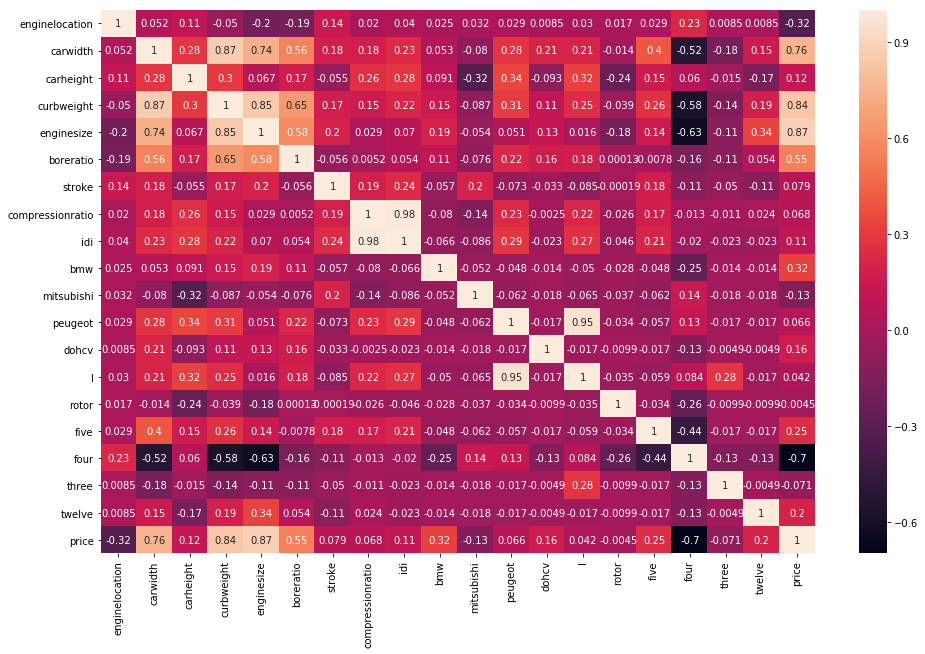

In [507]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [508]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['l'],axis=1)
data=data.drop(['l'],axis=1)

In [509]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     115.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.43e-68
Time:                        16:29:16   Log-Likelihood:                 237.74
No. Observations:                 143   AIC:                            -437.5
Df Residuals:                     124   BIC:                            -381.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3217      0.068  

In [510]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
7,compressionratio,70.70
0,enginelocation,64.64
3,curbweight,58.86
8,idi,50.79
4,enginesize,47.29
1,carwidth,46.31
15,four,37.05
5,boreratio,33.78
6,stroke,24.09
2,carheight,13.06


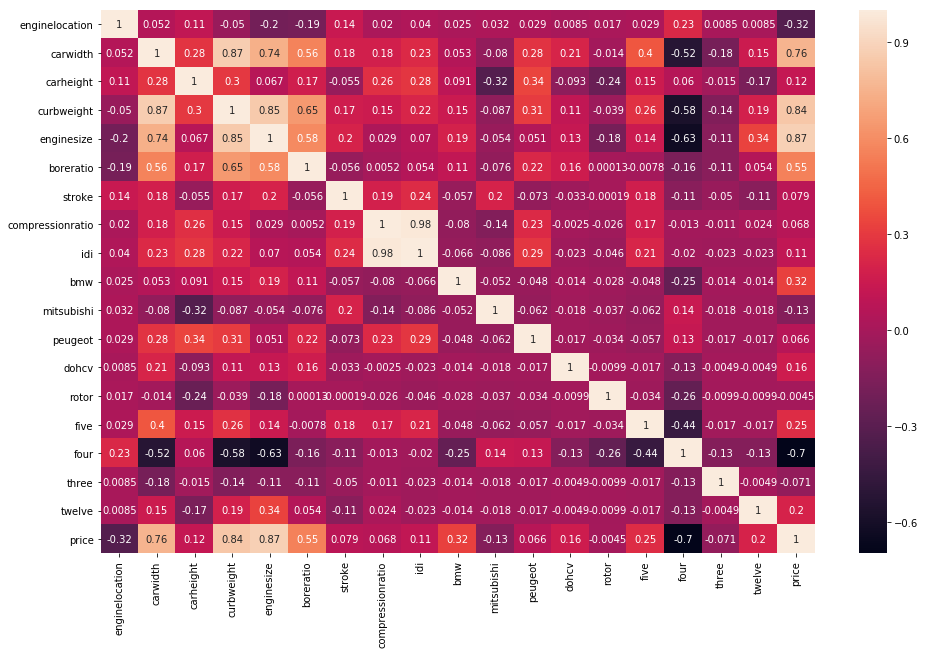

In [511]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [512]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['compressionratio'],axis=1)
data=data.drop(['compressionratio'],axis=1)

In [513]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.60e-69
Time:                        16:29:19   Log-Likelihood:                 237.15
No. Observations:                 143   AIC:                            -438.3
Df Residuals:                     125   BIC:                            -385.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2882      0.060      4.

In [514]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
3,curbweight,54.79
0,enginelocation,54.27
4,enginesize,47.10
1,carwidth,45.82
14,four,36.98
5,boreratio,33.51
6,stroke,24.07
2,carheight,12.60
12,rotor,2.84
13,five,2.65


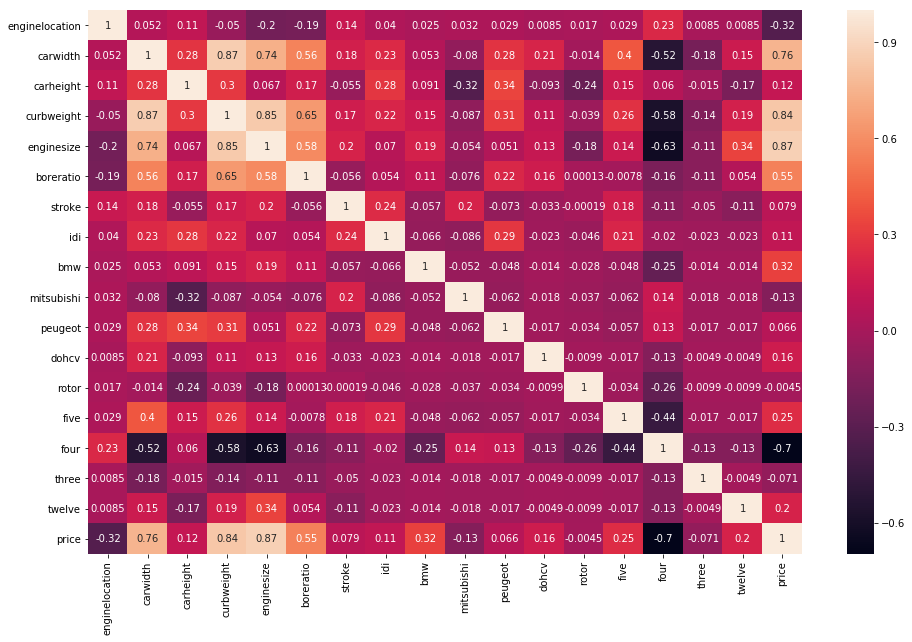

In [515]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [516]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['curbweight'],axis=1)
data=data.drop(['curbweight'],axis=1)

In [517]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.29e-65
Time:                        16:29:21   Log-Likelihood:                 223.18
No. Observations:                 143   AIC:                            -412.4
Df Residuals:                     126   BIC:                            -362.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2190      0.064      3.

In [518]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
0,enginelocation,53.14
3,enginesize,40.54
1,carwidth,39.71
13,four,34.80
4,boreratio,30.95
5,stroke,24.05
2,carheight,11.61
11,rotor,2.83
12,five,2.64
15,twelve,1.63


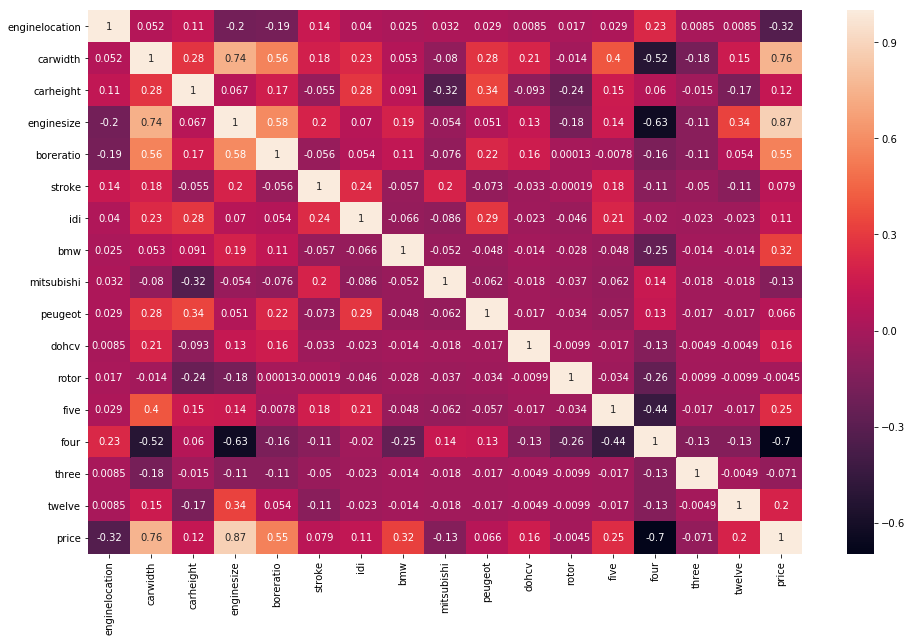

In [519]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [520]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['enginesize'],axis=1)
data=data.drop(['enginesize'],axis=1)

In [521]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     58.26
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.99e-49
Time:                        16:29:23   Log-Likelihood:                 179.85
No. Observations:                 143   AIC:                            -327.7
Df Residuals:                     127   BIC:                            -280.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3651      0.084      4.

In [522]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
0,enginelocation,51.42
1,carwidth,32.80
4,stroke,17.93
3,boreratio,16.03
12,four,14.89
2,carheight,11.60
11,five,1.69
8,peugeot,1.51
5,idi,1.43
6,bmw,1.33


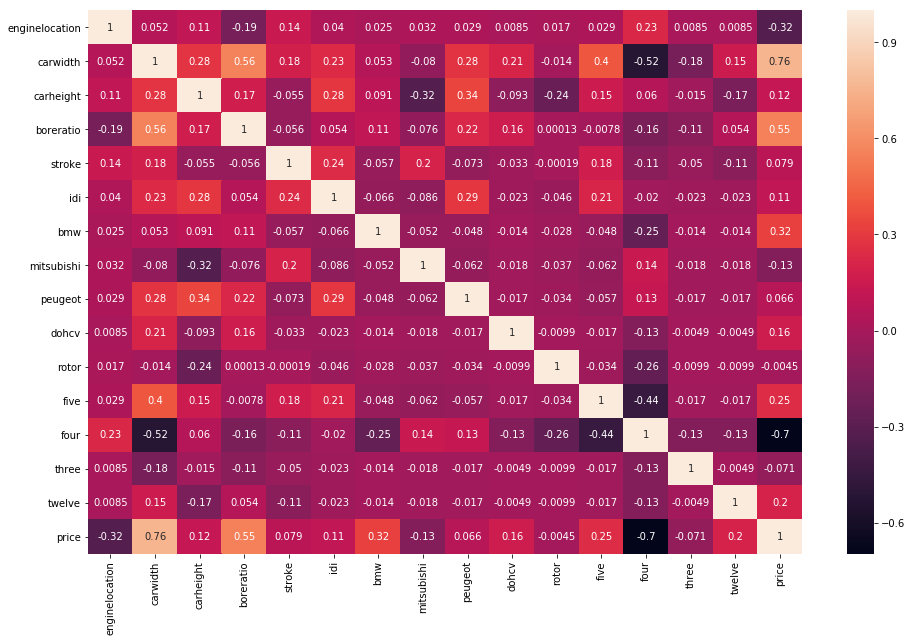

In [523]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [524]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['boreratio'],axis=1)
data=data.drop(['boreratio'],axis=1)

In [525]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     59.31
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.23e-49
Time:                        16:29:25   Log-Likelihood:                 176.18
No. Observations:                 143   AIC:                            -322.4
Df Residuals:                     128   BIC:                            -277.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4457      0.080      5.

In [526]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
0,enginelocation,50.41
1,carwidth,18.93
3,stroke,17.92
11,four,13.09
2,carheight,11.60
10,five,1.64
7,peugeot,1.50
4,idi,1.41
6,mitsubishi,1.32
9,rotor,1.30


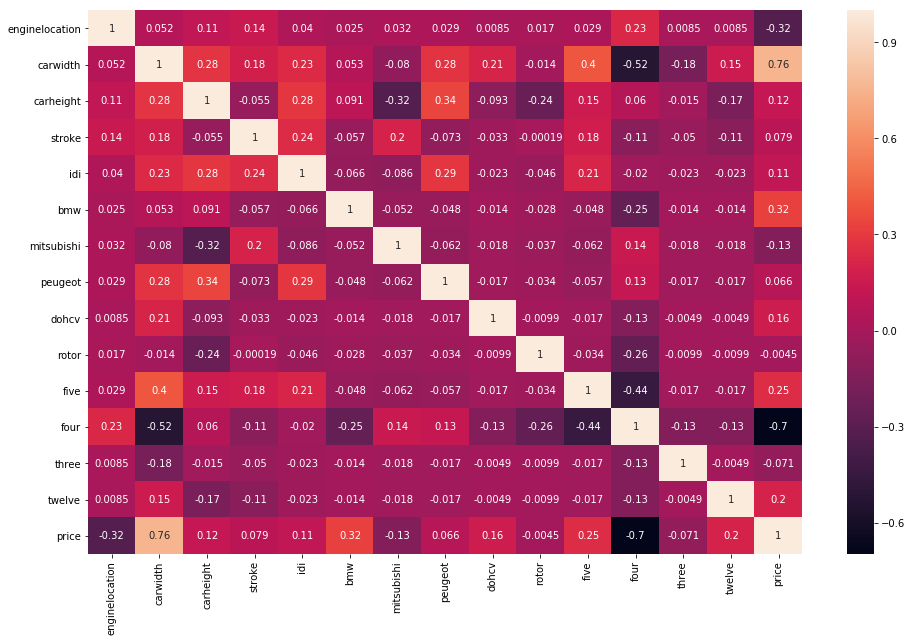

In [527]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [528]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['stroke'],axis=1)
data=data.drop(['stroke'],axis=1)

In [529]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     64.36
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.65e-50
Time:                        16:29:27   Log-Likelihood:                 176.17
No. Observations:                 143   AIC:                            -324.3
Df Residuals:                     129   BIC:                            -282.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4479      0.078      5.

In [530]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
0,enginelocation,38.95
1,carwidth,17.93
10,four,13.09
2,carheight,11.53
9,five,1.64
6,peugeot,1.44
3,idi,1.33
8,rotor,1.29
4,bmw,1.28
5,mitsubishi,1.28


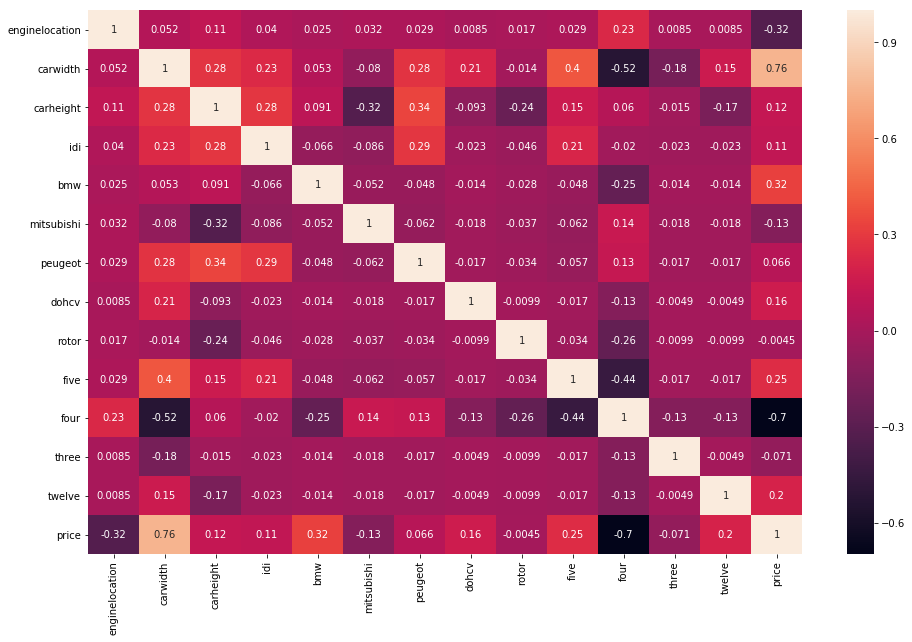

In [531]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [532]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['dohcv'],axis=1)
data=data.drop(['dohcv'],axis=1)

In [533]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     70.12
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.99e-51
Time:                        16:29:28   Log-Likelihood:                 176.04
No. Observations:                 143   AIC:                            -326.1
Df Residuals:                     130   BIC:                            -287.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4498      0.077      5.

In [534]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
0,enginelocation,38.94
1,carwidth,17.05
9,four,13.08
2,carheight,11.21
8,five,1.62
6,peugeot,1.44
3,idi,1.33
7,rotor,1.29
4,bmw,1.28
5,mitsubishi,1.27


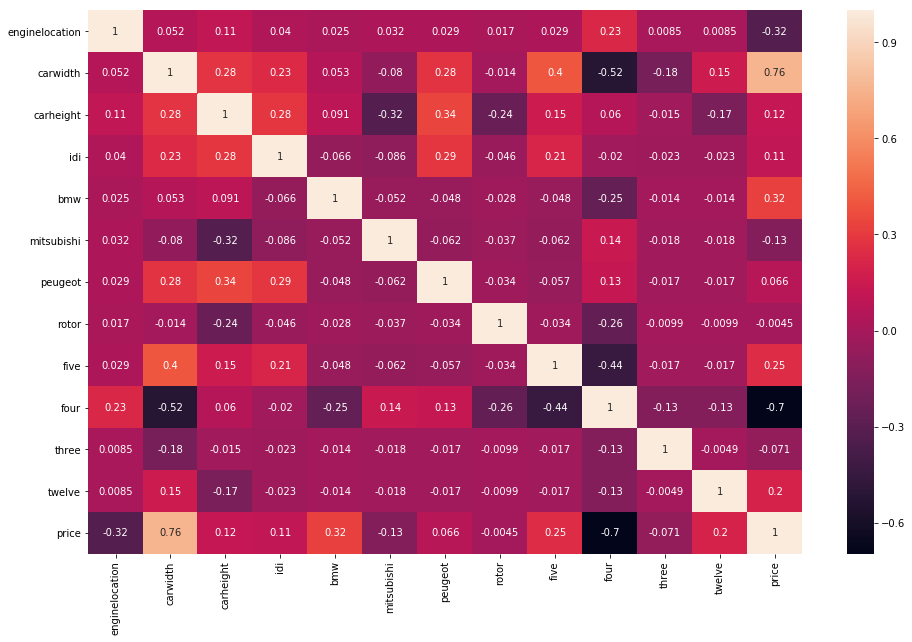

In [535]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [536]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['mitsubishi'],axis=1)
data=data.drop(['mitsubishi'],axis=1)

In [537]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     75.47
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.63e-51
Time:                        16:29:30   Log-Likelihood:                 174.74
No. Observations:                 143   AIC:                            -325.5
Df Residuals:                     131   BIC:                            -289.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4473      0.078      5.

In [538]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
0,enginelocation,38.87
1,carwidth,16.69
8,four,12.65
2,carheight,9.72
7,five,1.61
5,peugeot,1.44
3,idi,1.33
6,rotor,1.28
4,bmw,1.27
9,three,1.20


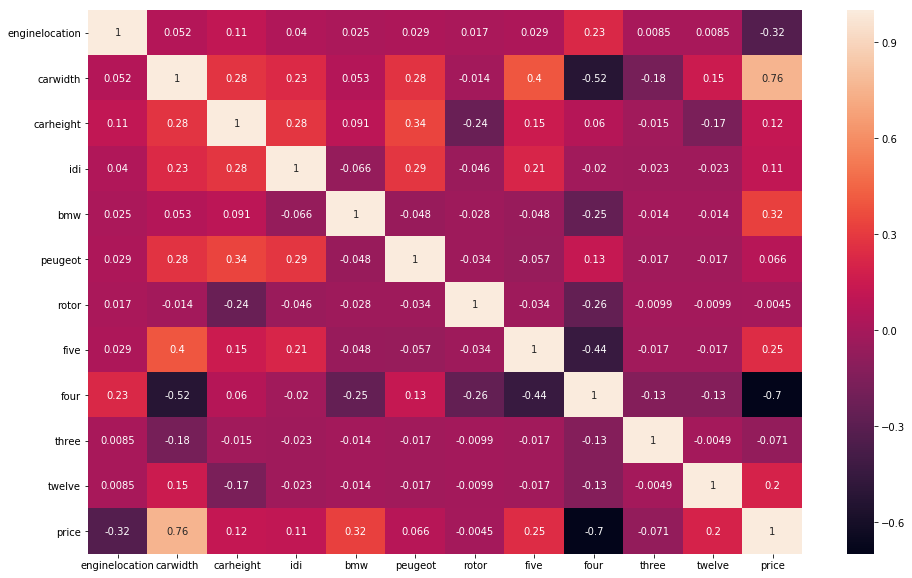

In [539]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [540]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['four'],axis=1)
data=data.drop(['four'],axis=1)

In [541]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     70.24
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.51e-48
Time:                        16:29:32   Log-Likelihood:                 164.08
No. Observations:                 143   AIC:                            -306.2
Df Residuals:                     132   BIC:                            -273.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3934      0.083      4.

In [542]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
0,enginelocation,13.09
1,carwidth,10.99
2,carheight,9.41
5,peugeot,1.36
7,five,1.36
3,idi,1.33
9,twelve,1.10
6,rotor,1.09
4,bmw,1.07
8,three,1.05


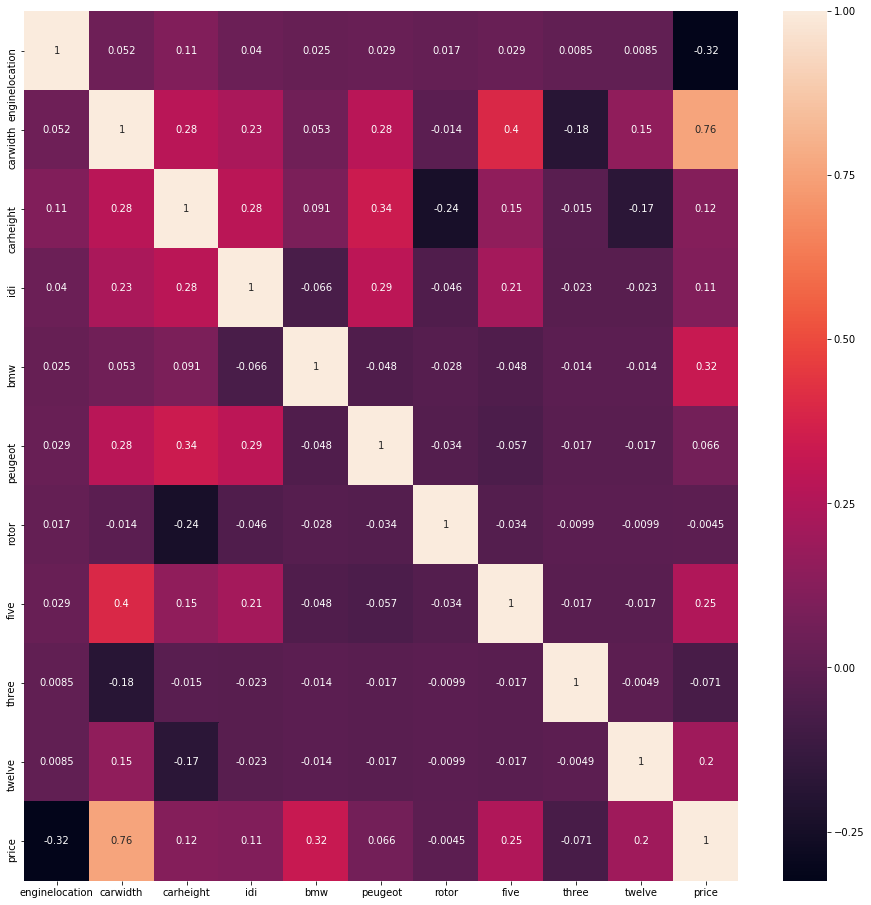

In [543]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,16))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [544]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['carheight'],axis=1)
data=data.drop(['carheight'],axis=1)

In [545]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     76.74
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.75e-48
Time:                        16:29:34   Log-Likelihood:                 162.62
No. Observations:                 143   AIC:                            -305.2
Df Residuals:                     133   BIC:                            -275.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3753      0.082      4.

In [546]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
1,carwidth,10.45
0,enginelocation,8.91
6,five,1.36
2,idi,1.29
4,peugeot,1.28
3,bmw,1.06
7,three,1.04
8,twelve,1.04
5,rotor,1.03


In [547]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['five'],axis=1)
data=data.drop(['five'],axis=1)

In [548]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     85.96
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.50e-49
Time:                        16:29:34   Log-Likelihood:                 161.91
No. Observations:                 143   AIC:                            -305.8
Df Residuals:                     134   BIC:                            -279.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3840      0.082      4.

In [549]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
1,carwidth,8.70
0,enginelocation,8.03
2,idi,1.25
4,peugeot,1.22
3,bmw,1.06
6,three,1.04
7,twelve,1.03
5,rotor,1.02


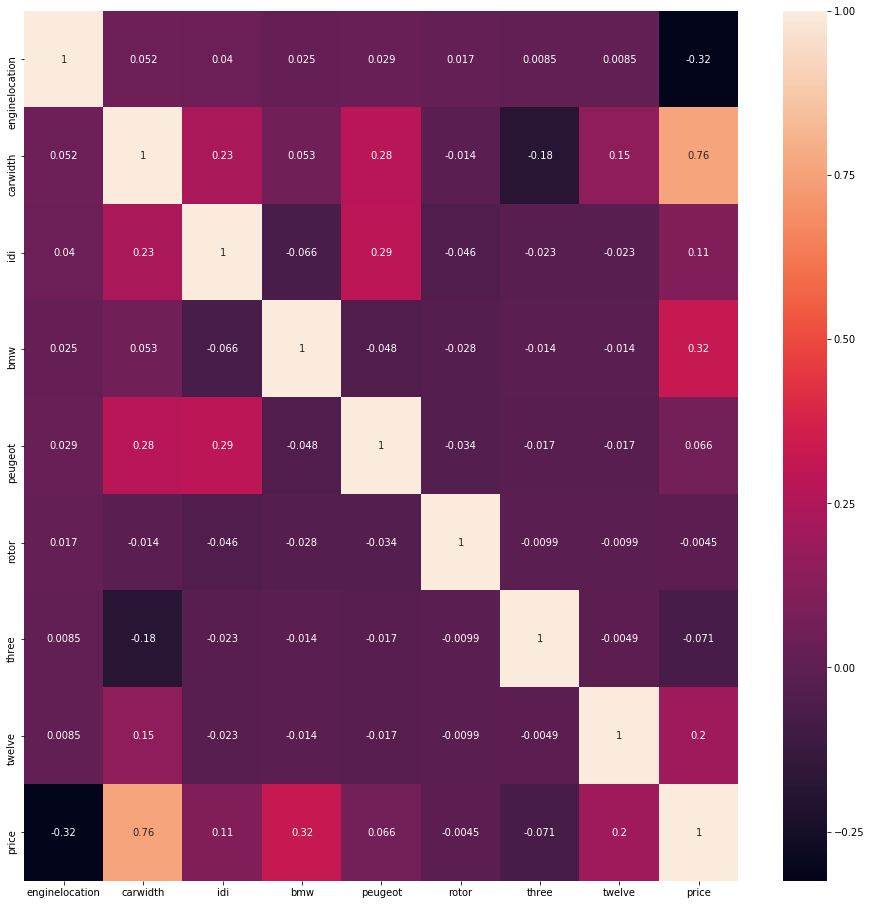

In [550]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,16))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [551]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['idi'],axis=1)
data=data.drop(['idi'],axis=1)

In [552]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     98.27
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.95e-50
Time:                        16:29:36   Log-Likelihood:                 161.48
No. Observations:                 143   AIC:                            -307.0
Df Residuals:                     135   BIC:                            -283.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3806      0.082      4.

In [553]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
1,carwidth,8.45
0,enginelocation,8.01
3,peugeot,1.15
2,bmw,1.05
5,three,1.04
6,twelve,1.03
4,rotor,1.02


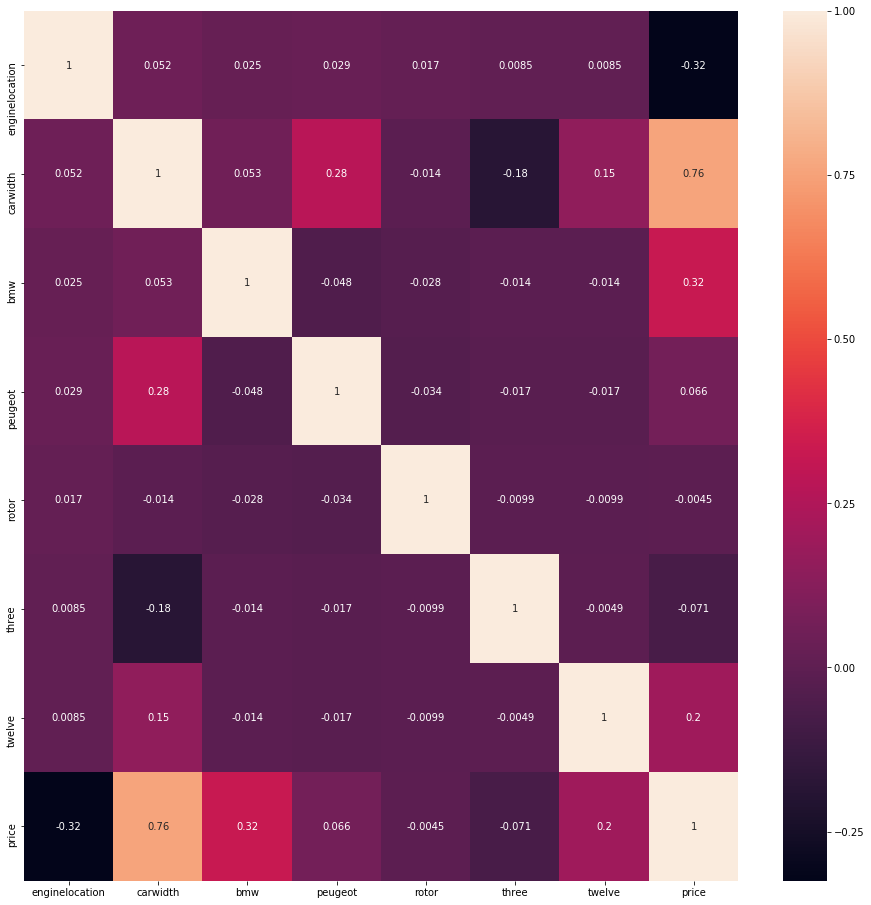

In [554]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,16))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [555]:
#droping one column from training set and main dataframe
X_train_rfe=X_train_rfe.drop(['rotor'],axis=1)
data=data.drop(['rotor'],axis=1)

In [556]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model again
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     115.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.36e-51
Time:                        16:29:37   Log-Likelihood:                 161.30
No. Observations:                 143   AIC:                            -308.6
Df Residuals:                     136   BIC:                            -287.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3806      0.082      4.

In [557]:
#Computing VIF values for each variable
vif_cal(data,'price')

,Var,Vif
1,carwidth,8.45
0,enginelocation,7.98
3,peugeot,1.15
2,bmw,1.05
4,three,1.04
5,twelve,1.03


# Predictions

In [558]:
# Adding  constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [559]:
# Creating X_test dataframe with only the final selected features
X_test=X_test[X_train_rfe.columns]

In [560]:
# Making predictions
y_pred = lm.predict(X_test)

# Model Evaluation

Text(0,0.5,'Car Price')

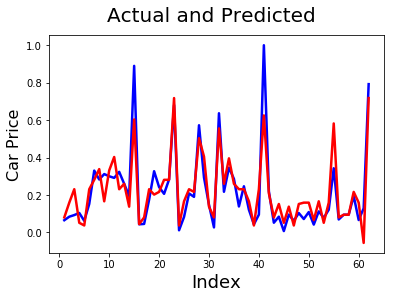

In [569]:
# Representing Actual vs Predicted values graphically
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

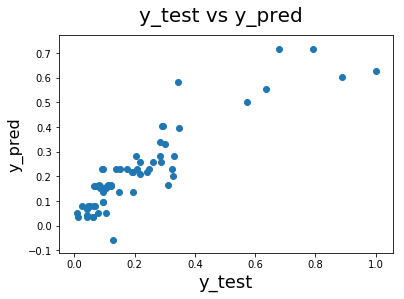

In [570]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

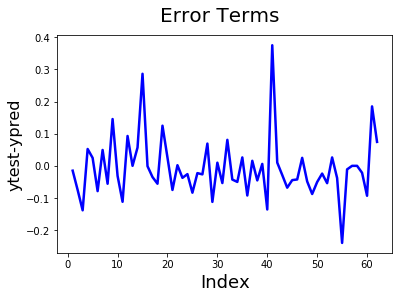

In [571]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

G:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Index')

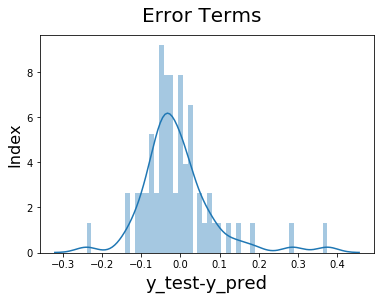

In [573]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [574]:
#Calculating RMSE value
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.09336595353427342


In [604]:
#To run the Durbin-Watson statistic to check for presence of Auto-Correlation in our model
array=sm.stats.stattools.durbin_watson(X_train_rfe)